In [1]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt
from pandas.plotting import lag_plot


In [2]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

iag = pd.read_csv('IAG.MC.csv')

iag.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,1.8495,1.8500,1.6550,1.6610,1.6610,38696800
1,2021-01-05,1.6420,1.6995,1.6000,1.6575,1.6575,24855270
2,2021-01-06,1.6830,1.7600,1.6465,1.7505,1.7505,21294975
3,2021-01-07,1.7575,1.7700,1.6760,1.7375,1.7375,20918102
4,2021-01-08,1.7640,1.7980,1.7275,1.7345,1.7345,33522834


In [3]:
# Paso 2: Modificar nombre de columnas a lower

iag.columns = iag.columns.str.lower()


In [4]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

iag['date'] = pd.to_datetime(iag['date'], format="%Y-%m-%d")

iag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       814 non-null    datetime64[ns]
 1   open       814 non-null    float64       
 2   high       814 non-null    float64       
 3   low        814 non-null    float64       
 4   close      814 non-null    float64       
 5   adj close  814 non-null    float64       
 6   volume     814 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 44.6 KB


In [5]:
# Paso 5: Ordenar el DF por fecha

iag.sort_values(by='date',ascending= True, inplace=True)

iag.head()

,date,open,high,low,close,adj close,volume
0,2021-01-04,1.8495,1.8500,1.6550,1.6610,1.6610,38696800
1,2021-01-05,1.6420,1.6995,1.6000,1.6575,1.6575,24855270
2,2021-01-06,1.6830,1.7600,1.6465,1.7505,1.7505,21294975
3,2021-01-07,1.7575,1.7700,1.6760,1.7375,1.7375,20918102
4,2021-01-08,1.7640,1.7980,1.7275,1.7345,1.7345,33522834


In [6]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

iag = iag[(iag['date'] >= fecha_inicio) & (iag['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

iag.shape

(812, 7)

In [7]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=iag['date'].min(), end=iag['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

iag = iag.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

iag = iag.rename(columns={'index': 'date'})


In [8]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

iag.head(10)

,date,open,high,low,close,adj close,volume
0,2021-01-04,1.8495,1.8500,1.6550,1.6610,1.6610,38696800.0
1,2021-01-05,1.6420,1.6995,1.6000,1.6575,1.6575,24855270.0
2,2021-01-06,1.6830,1.7600,1.6465,1.7505,1.7505,21294975.0
3,2021-01-07,1.7575,1.7700,1.6760,1.7375,1.7375,20918102.0
4,2021-01-08,1.7640,1.7980,1.7275,1.7345,1.7345,33522834.0
5,2021-01-09,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-01-10,NaN,NaN,NaN,NaN,NaN,NaN
7,2021-01-11,1.7250,1.7335,1.6865,1.7000,1.7000,17922352.0
8,2021-01-12,1.7200,1.7720,1.7120,1.7625,1.7625,30800151.0
9,2021-01-13,1.7680,1.7685,1.7010,1.7120,1.7120,18309808.0


In [9]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

iag = iag.fillna(method='ffill')

In [10]:
# Paso 10: Comprobar que se han introducido los valores correctamente


iag.head(10)

,date,open,high,low,close,adj close,volume
0,2021-01-04,1.8495,1.8500,1.6550,1.6610,1.6610,38696800.0
1,2021-01-05,1.6420,1.6995,1.6000,1.6575,1.6575,24855270.0
2,2021-01-06,1.6830,1.7600,1.6465,1.7505,1.7505,21294975.0
3,2021-01-07,1.7575,1.7700,1.6760,1.7375,1.7375,20918102.0
4,2021-01-08,1.7640,1.7980,1.7275,1.7345,1.7345,33522834.0
5,2021-01-09,1.7640,1.7980,1.7275,1.7345,1.7345,33522834.0
6,2021-01-10,1.7640,1.7980,1.7275,1.7345,1.7345,33522834.0
7,2021-01-11,1.7250,1.7335,1.6865,1.7000,1.7000,17922352.0
8,2021-01-12,1.7200,1.7720,1.7120,1.7625,1.7625,30800151.0
9,2021-01-13,1.7680,1.7685,1.7010,1.7120,1.7120,18309808.0


In [11]:
# Paso 11: Establecer columna 'date' como índice para modelo

iag = iag.set_index('date')

iag.head(10)

,open,high,low,close,adj close,volume
date,,,,,,
2021-01-04,1.8495,1.8500,1.6550,1.6610,1.6610,38696800.0
2021-01-05,1.6420,1.6995,1.6000,1.6575,1.6575,24855270.0
2021-01-06,1.6830,1.7600,1.6465,1.7505,1.7505,21294975.0
2021-01-07,1.7575,1.7700,1.6760,1.7375,1.7375,20918102.0
2021-01-08,1.7640,1.7980,1.7275,1.7345,1.7345,33522834.0
2021-01-09,1.7640,1.7980,1.7275,1.7345,1.7345,33522834.0
2021-01-10,1.7640,1.7980,1.7275,1.7345,1.7345,33522834.0
2021-01-11,1.7250,1.7335,1.6865,1.7000,1.7000,17922352.0
2021-01-12,1.7200,1.7720,1.7120,1.7625,1.7625,30800151.0


In [12]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

iag.index = pd.DatetimeIndex(iag.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

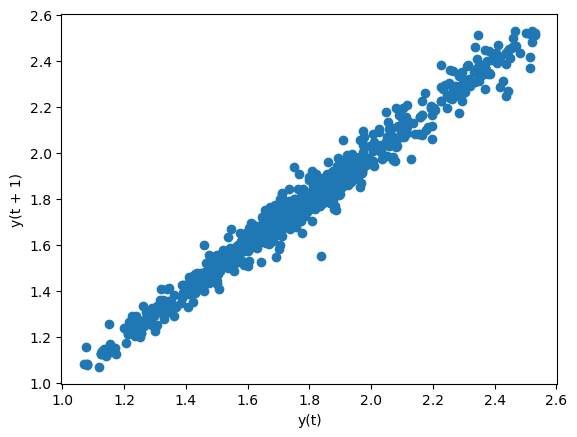

In [13]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

lag_plot(iag.close)

In [14]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [15]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = iag.close[:-10], iag.close[-10:]

train.shape, test.shape

((1143,), (10,))

In [16]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [17]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(iag.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    1.726483
2024-02-22    1.726962
2024-02-23    1.727436
2024-02-24    1.727906
2024-02-25    1.728372
2024-02-26    1.728834
2024-02-27    1.729292
2024-02-28    1.729745
2024-02-29    1.730195
2024-03-01    1.730640
Freq: D, dtype: float64

In [18]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    1.7560
2024-02-22    1.7965
2024-02-23    1.7840
2024-02-24    1.7840
2024-02-25    1.7840
2024-02-26    1.8075
2024-02-27    1.8255
2024-02-28    1.7860
2024-02-29    1.7270
2024-03-01    1.7140
Freq: D, Name: close, dtype: float64

In [19]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

0.05183057723574398

In [20]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,1.7560,1.726483,-0.029517
2024-02-22,1.7965,1.726962,-0.069538
2024-02-23,1.7840,1.727436,-0.056564
2024-02-24,1.7840,1.727906,-0.056094
2024-02-25,1.7840,1.728372,-0.055628
2024-02-26,1.8075,1.728834,-0.078666
2024-02-27,1.8255,1.729292,-0.096208
2024-02-28,1.7860,1.729745,-0.056255
2024-02-29,1.7270,1.730195,0.003195
2024-03-01,1.7140,1.730640,0.016640
